In [61]:
# Read the csv file and load it into a pandas dataframe.

# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [62]:
# Import the diabetes dataset
df = pd.read_csv('/Users/viedamayanti/Desktop/Data-Glacier/Week4/diabetes.csv') 

In [63]:
# Exploratory Data Analysis (EDA)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Data Understanding: I read the dataset and understand what each feature represents. What is the potential relevance feature for diabetes prediction.

Feature relevance for diabetes:

•	Glucose Levels: Among the most critical predictors for diabetes.

•	BMI (Body Mass Index): High BMI often correlates with diabetes risk.

•	Age: Age can be a significant factor in diabetes risk assessment.

•	Insulin Levels: Relevant but might have multicollinearity with other features.

•	Pregnancies: Relevant for gestational diabetes prediction (in females).

•	Blood Pressure: Can be relevant but might have less direct impact compared to glucose or BMI.

•	Skin Thickness: Might have less direct impact compared to other features.

•	Diabetes Pedigree Function: Measures genetic predisposition, but might have less impact alone.


In [64]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [65]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [66]:
# This format is more easy to understand
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [67]:
# Check null values
def check_null(df):
    return df.isnull().sum()
print(check_null(df))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [68]:
# Check the specific columns before replacement
print(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].head(2))

# Make the replacement
df_copy = df.copy(deep=True)
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Check the specific columns after replacement
print(df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].head(2))


   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0      148             72             35        0  33.6
1       85             66             29        0  26.6
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0      NaN  33.6
1     85.0           66.0           29.0      NaN  26.6


In [69]:
check_null(df_copy)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

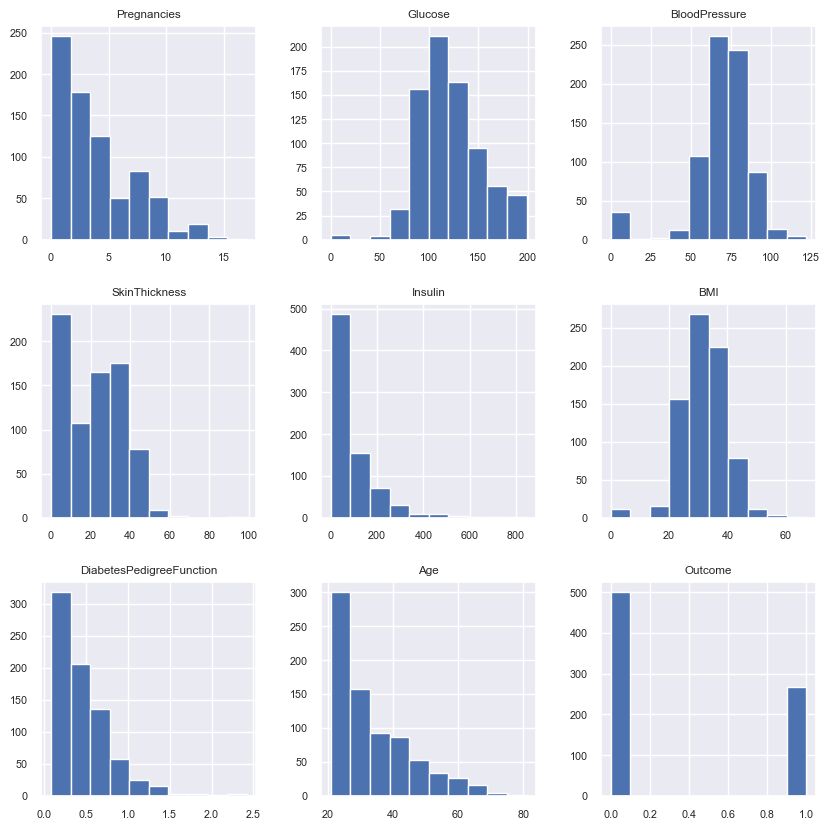

In [70]:
# Data Visualization 
# With NaN values
plot = df.hist(figsize=(10,10))

In [71]:
# As it not supposed to have a NaN dataset then we need to fill up the NaN value either with the mean or median 
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

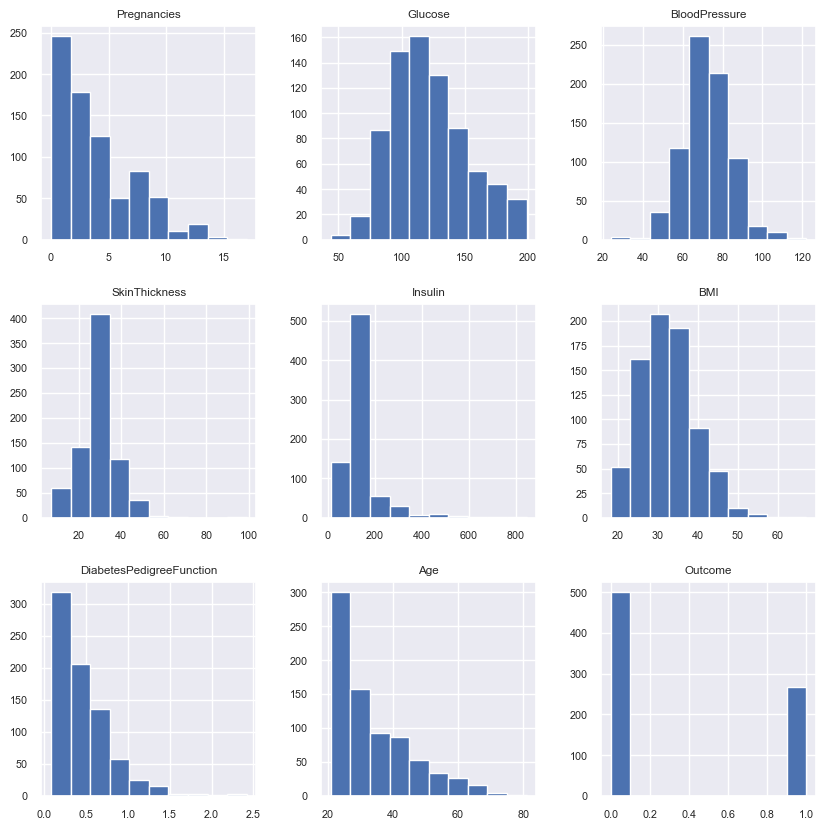

In [72]:
plot = df_copy.hist(figsize=(10,10))

In [73]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


All missing values are filling up

In [74]:
plot_outcome = df['Outcome'].value_counts()
print(plot_outcome)

Outcome
0    500
1    268
Name: count, dtype: int64


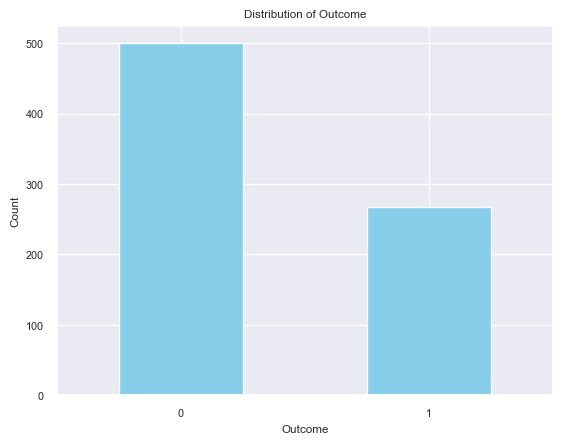

In [75]:
# Plotting the outcome distribution
plot_outcome.plot(kind='bar', color='skyblue')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.xticks(rotation=0) 
plt.show()

The number of people without diabetes, based on the data, is double that of those with diabetes. '0' indicates non-diabetes while '1' identifies diabetes

In [76]:
# Correlation between all feature 
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Compute the correlation matrix
correlation_matrix = df_copy[selected_columns].corr()


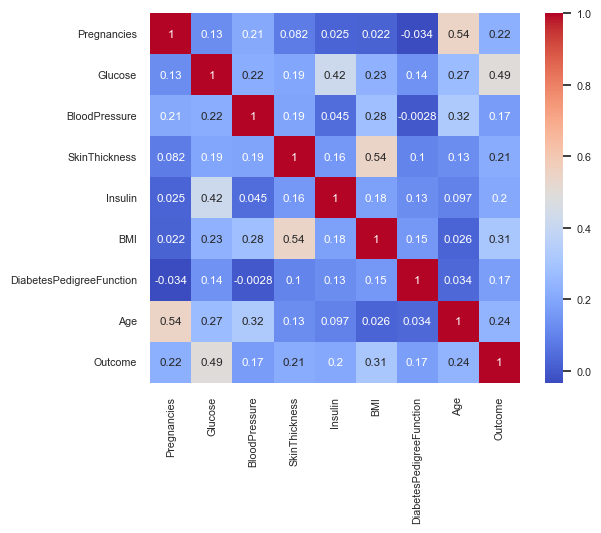

<Figure size 1200x1000 with 0 Axes>

In [77]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
sns.set(font_scale=0.7) 
plt.figure(figsize=(12,10))
plt.show()

Roughly 49% of the features relate to Glucose, while 31% correspond to BMI and their association with the diabetes outcome

In [78]:
# Check duplicate data
df_copy.duplicated().sum()

0

In [79]:
# Data Splitting 
from sklearn.model_selection import train_test_split
x = df.drop(columns = "Outcome")
y = df['Outcome']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [22]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
# Check Dimension
print('X_train shape: ', X_train_resampled.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ',y_train_resampled.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (750, 8)
X_test shape:  (192, 8)
y_train shape:  (750,)
y_test shape:  (192,)


Splitting the data involves segregating 'y' as the diabetes column, which holds binary values, while 'x' represents the remaining eight columns. In total, there are nine columns

In [24]:
# Data Modeling 
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [25]:
y_pred_logreg = logreg.predict(X_test)


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


def confusion_matrix_display(y_true, y_pred):
    print(f'Balanced accuracy score: {accuracy_score(y_true, y_pred)}')

    print(classification_report(y_true, y_pred))

    ax = plt.subplot()

    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='g', ax=ax, cmap='Blues')

    ax.set_title('Confusion matrix')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    plt.show()

Balanced accuracy score: 0.7395833333333334
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       125
           1       0.61      0.69      0.65        67

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.72       192
weighted avg       0.75      0.74      0.74       192



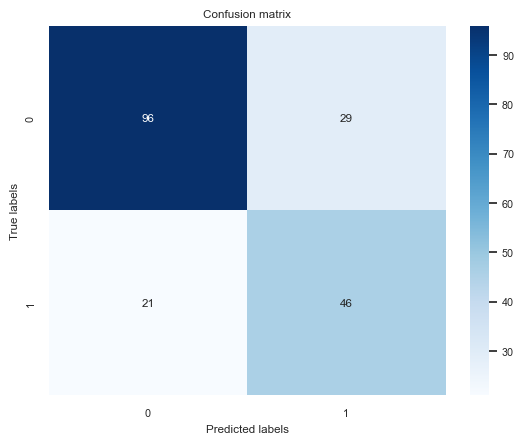

In [27]:
confusion_matrix_display(y_test, y_pred_logreg)

In [28]:
# 2. K-Nearest Neighbor KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [29]:
train_score = []
test_score = []

for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train_resampled, y_train_resampled)

    train_score.append(knn.score(X_train_resampled, y_train_resampled))
    test_score.append(knn.score(X_test, y_test))


In [30]:
# Finding the best k value based on test set accuracy
best_k = test_score.index(max(test_score)) + 1
print(f"The best k value is: {best_k}")

The best k value is: 26


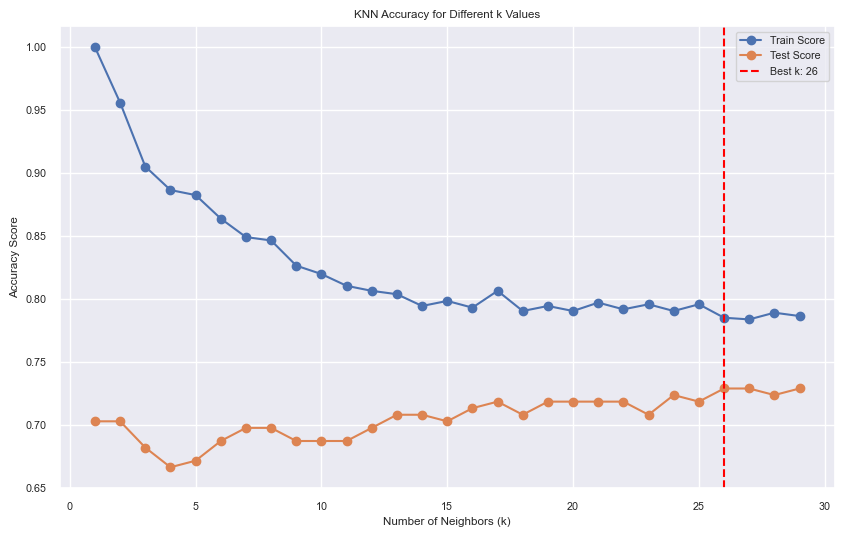

In [31]:
# Plotting the accuracy scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), train_score, label='Train Score', marker='o')
plt.plot(range(1, 30), test_score, label='Test Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy for Different k Values')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k: {best_k}')
plt.legend()
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=26)

In [33]:
# Predicting KNN model 
y_pred_knn = knn.predict(X_test)

Balanced accuracy score: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       125
           1       0.60      0.67      0.63        67

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.73       192



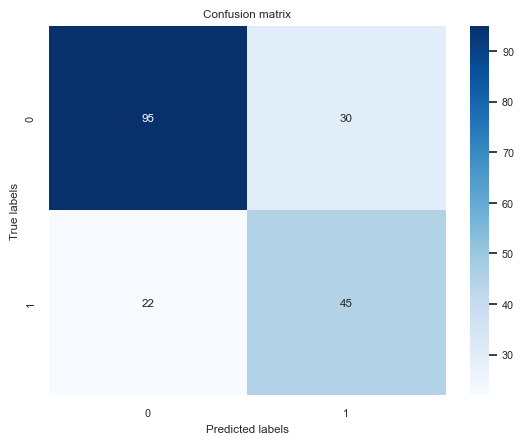

In [34]:
confusion_matrix_display(y_test, y_pred_knn)

In [35]:
# 3. Support Vector Classifier Algorithm
# Svc kernel = linear 
from sklearn.svm import SVC
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

In [36]:
# Predicting SVC model 
y_pred_svc = svc_linear.predict(X_test)

Balanced accuracy score: 0.7604166666666666
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       125
           1       0.64      0.70      0.67        67

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.77      0.76      0.76       192



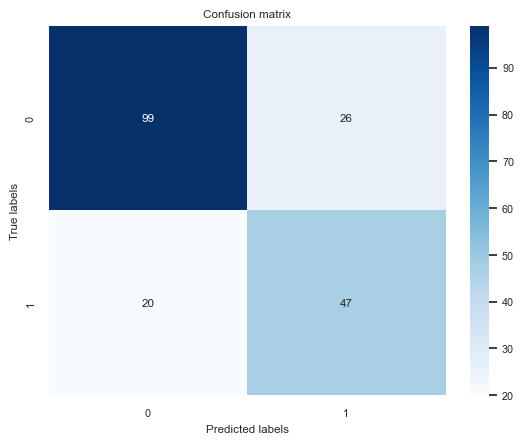

In [37]:
confusion_matrix_display(y_test, y_pred_svc)

In [38]:
# Svc kernel = polynomial 
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train_resampled, y_train_resampled)

SVC(kernel='poly')

In [39]:
y_pred_poly = svc_poly.predict(X_test)

Balanced accuracy score: 0.7239583333333334
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       125
           1       0.62      0.52      0.57        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.72      0.72      0.72       192



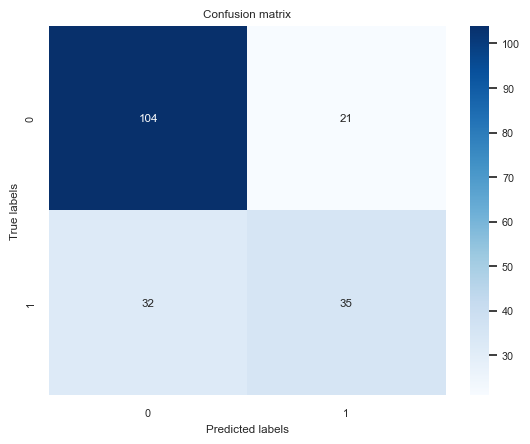

In [40]:
confusion_matrix_display(y_test, y_pred_poly)

In [41]:
# SVC kerne = gaussian 
svc_gauss = SVC(kernel='rbf')
svc_gauss.fit(X_train_resampled, y_train_resampled)

SVC()

In [42]:
y_pred_gauss = svc_gauss.predict(X_test)

Balanced accuracy score: 0.7291666666666666
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       125
           1       0.59      0.72      0.65        67

    accuracy                           0.73       192
   macro avg       0.71      0.73      0.71       192
weighted avg       0.75      0.73      0.73       192



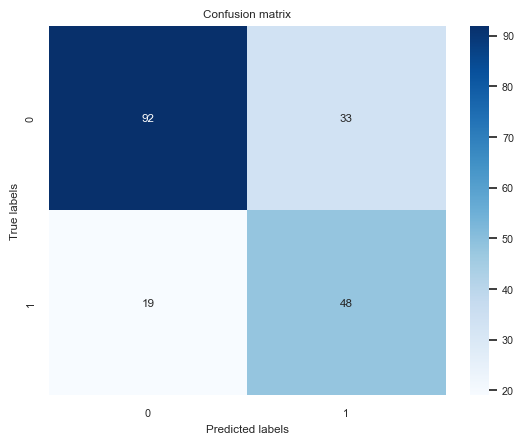

In [43]:
confusion_matrix_display(y_test, y_pred_gauss)

In [44]:
# SVC kernel = sigmoid 
svc_sigm = SVC(kernel='sigmoid')
svc_sigm.fit(X_train_resampled, y_train_resampled)


SVC(kernel='sigmoid')

In [45]:
y_pred_sigm = svc_sigm.predict(X_test)

Balanced accuracy score: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       125
           1       0.52      0.64      0.57        67

    accuracy                           0.67       192
   macro avg       0.65      0.66      0.65       192
weighted avg       0.69      0.67      0.67       192



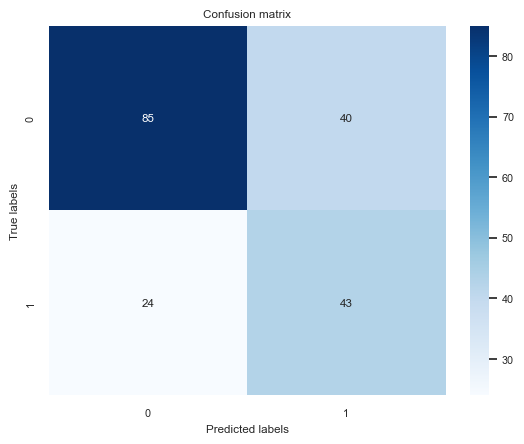

In [46]:
confusion_matrix_display(y_test, y_pred_sigm)

In [47]:
# 4. Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [48]:
y_pred_nb = nb.predict(X_test)

Balanced accuracy score: 0.734375
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       125
           1       0.60      0.72      0.65        67

    accuracy                           0.73       192
   macro avg       0.72      0.73      0.72       192
weighted avg       0.75      0.73      0.74       192



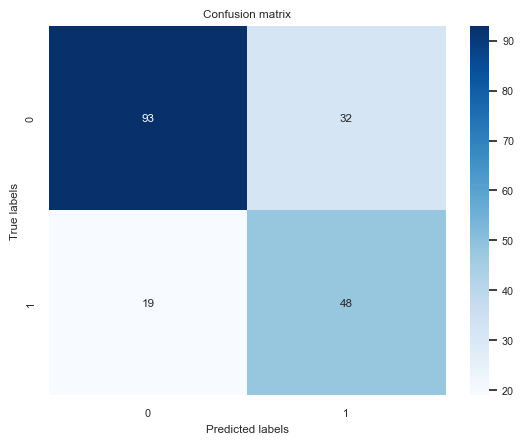

In [49]:
confusion_matrix_display(y_test, y_pred_nb)

In [50]:
# 5. Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [51]:
y_pred_dt = dt.predict(X_test)

Balanced accuracy score: 0.7239583333333334
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       125
           1       0.61      0.57      0.59        67

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192



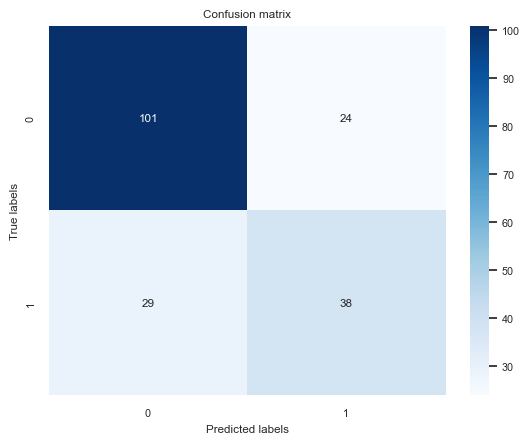

In [52]:
confusion_matrix_display(y_test, y_pred_dt)

In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(criterion='entropy', random_state=42)

In [54]:
y_pred_rf = rf.predict(X_test)

Balanced accuracy score: 0.7604166666666666
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       125
           1       0.66      0.66      0.66        67

    accuracy                           0.76       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



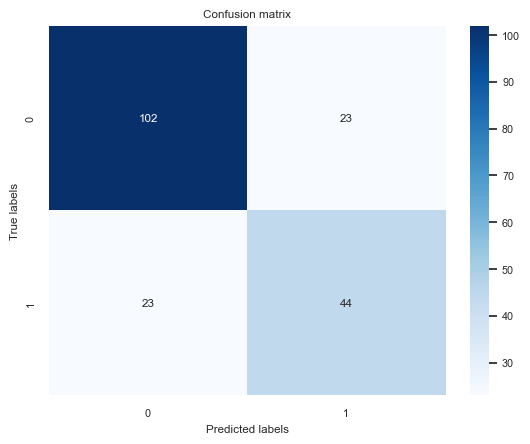

In [55]:
confusion_matrix_display(y_test, y_pred_rf)

In [56]:
import pickle
from sklearn.preprocessing import StandardScaler

pickle.dump(rf, open('model.pkl', 'wb'))
scaler = StandardScaler()
scaler.fit(X_train_resampled)

pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [57]:
load_model = pickle.load(open('model.pkl','rb'))
load_model

RandomForestClassifier(criterion='entropy', random_state=42)

In [58]:
def predict_diabetes(rf, pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age):
    # Create a DataFrame with the user input
    user_input = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })
    user_scaled = scaler.transform(user_input)
    print(user_scaled)
    prediction = rf.predict(user_scaled)

    return prediction

In [59]:
result = predict_diabetes(ReferenceError,1, 85, 66, 29, 125, 26, 0.32, 31)

if result == 0:
    print('Non diabetic')
else:
    print('Diabetic')

[[  0.9142121   83.02906581  65.06704371  28.99151086 124.9555677
   27.35867929   0.26798087  31.37681146]]


AttributeError: type object 'ReferenceError' has no attribute 'predict'

In [ ]:
df_copy.head(3)